# Shikari King

## Research question/interests
How do different factors contributing to happiness, such as income, social support, freedom, and corruption, vary across different regions in the world, and how do these regional differences affect overall levels of happiness and life satisfaction?

In [52]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import geopandas as gpd
import geoplot as gplt
import sys
sys.path.append('../')

In [53]:
# Importing Functions to be used
from scripts import project_functions2 as pf

In [54]:
# Loading the dataframes to be analyzed
# Fixing the name United States
Data2015 = pd.read_csv('../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../data/processed/2022_Clean_Data.csv')
DataCombine = pd.read_csv('../data/processed/Overall(No-Year)_Clean_Data.csv')
DataAllYears = pd.read_csv('../data/processed/Overall(With-year)_Clean_Data.csv')
DataAllRegion = pd.read_csv('../data/processed/Overall(With-Region-Year)_Clean_Data.csv')

datasets = [Data2015, Data2016, Data2017, Data2018, Data2019, Data2020, Data2021, Data2022, DataCombine, DataAllYears]
for data in datasets:
    data['Country'] = data['Country'].replace('United States', 'United States of America')

DataAllRegion.columns

Index(['Country', 'Year', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom to make life choices', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Social support',
       'Perceptions of corruption', 'Logged GDP per capita',
       'Healthy life expectancy', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita'],
      dtype='object')

In [55]:
datasets = [(Data2015,'Happiness vs Region (Box Plot) - 2015'),
            (Data2016,'Happiness vs Region (Box Plot) - 2016'),
            (Data2017,'Happiness vs Region (Box Plot) - 2017'),
            (Data2018,'Happiness vs Region (Box Plot) - 2018'), 
            (Data2019,'Happiness vs Region (Box Plot) - 2019'),
            (Data2020,'Happiness vs Region (Box Plot) - 2020'),
            (Data2021,'Happiness vs Region (Box Plot) - 2021'),
            (Data2022,'Happiness vs Region (Box Plot) - 2022')]

# Pipeline

- Creating Economy vs Region Plot
- Happiness by region chart
- World map showing all of this

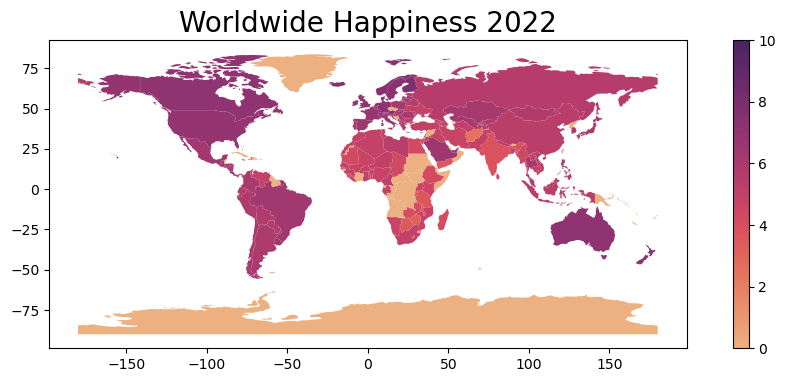

In [59]:
pf.create_world_map(Data2021)

### The above image shows worldwide happiness in 2022 and I want to exlore the reasons as to why some countries are much happier than others

/var/folders/35/3_sm6blj54z_h_k7jhl5n4600000gn/T/ipykernel_94347/1843529166.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataAllRegion.loc[:, 'Region'] = DataAllRegion['Region'].replace(region_dict)


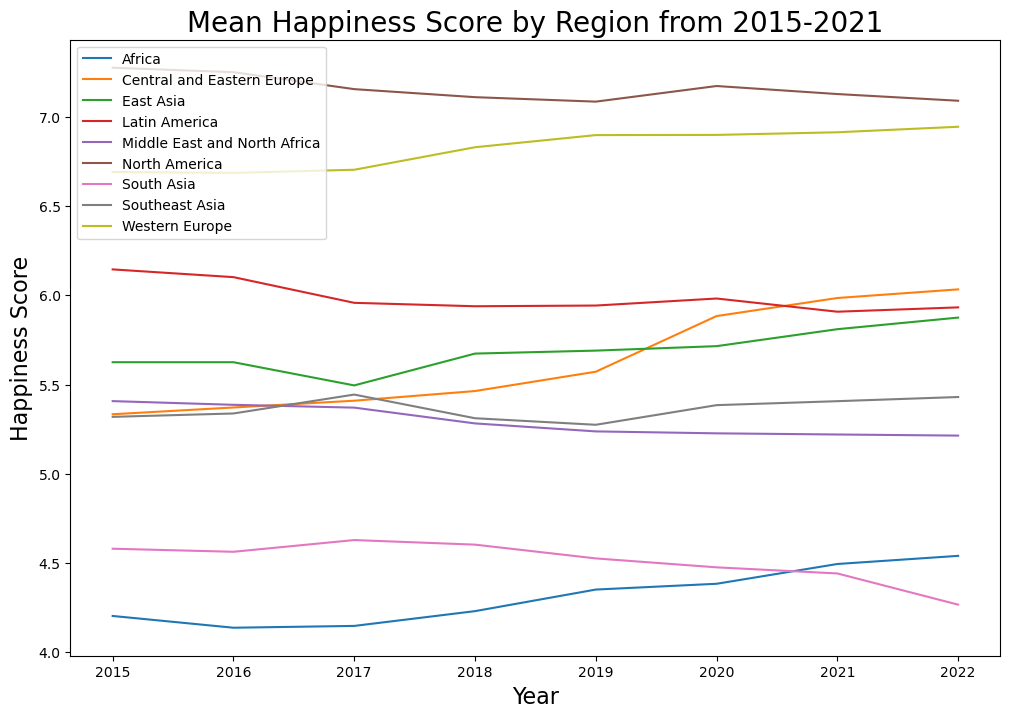

In [14]:
# Create a dictionary to map similar regions together
region_dict = {
    'Southern Asia': 'South Asia',
    'Middle East and Northern Africa': 'Middle East and North Africa',
    'Sub-Saharan Africa': 'Africa',
    'Latin America and Caribbean': 'Latin America',
    'Commonwealth of Independent States': 'CIS',
    'Australia and New Zealand': 'ANZ',
    'North America and ANZ': 'North America',
    'Southeastern Asia': 'Southeast Asia',
    'Eastern Asia': 'East Asia'
}

# Replace the incorrect region spellings with the correct ones
DataAllRegion['Region'] = DataAllRegion['Region'].replace(region_dict)

# Drop rows containing 'ANZ' or 'CIS' in the 'Region' column
DataAllRegion = DataAllRegion[~DataAllRegion['Region'].isin(['ANZ', 'CIS'])]

# Replace any other regions with the appropriate values using region_dict
DataAllRegion.loc[:, 'Region'] = DataAllRegion['Region'].replace(region_dict)

# Create a new dataframe with region-wise average happiness score for each year
region_data = DataAllRegion.groupby(['Year', 'Region'])['Happiness Score'].mean().reset_index()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

for region in region_data['Region'].unique():
    # Get the data for the current region
    region_subset = region_data[region_data['Region'] == region]
    # Plot the region's data
    ax.plot(region_subset['Year'], region_subset['Happiness Score'], label=region)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Happiness Score', fontsize=16)
ax.set_title('Mean Happiness Score by Region from 2015-2021', fontsize= 20)

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(0, 1), loc='upper left')

# Show the plot
plt.show()

 ### Looking at this chart I am seeing the mean happiness over time and some regions different levels of happiness and it is not a linear way